# KMeans from Scratch

Machine Learning Class at ITESO - 2023

In [2]:
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Create Data

In [3]:
# create fake data
X, y = make_blobs(n_samples = 100, centers = 3, n_features = 2, random_state = 42, cluster_std = 2)

In [4]:
set(y)

{np.int64(0), np.int64(1), np.int64(2)}

In [5]:
df = pd.DataFrame()
df['class'] = y
df['x1'] = X[:, 0]
df['x2'] = X[:, 1]
df

,class,x1,x2
0,2,-8.573215,-9.909804
1,1,6.266913,-0.488559
2,0,-3.448146,10.099406
3,1,7.445467,-0.830532
4,2,-6.164052,-5.758541
...,...,...,...
95,0,-3.863042,10.237639
96,0,-0.447199,10.876846
97,1,4.317307,2.781271
98,2,-4.713525,-4.772505


<Axes: xlabel='x1', ylabel='x2'>

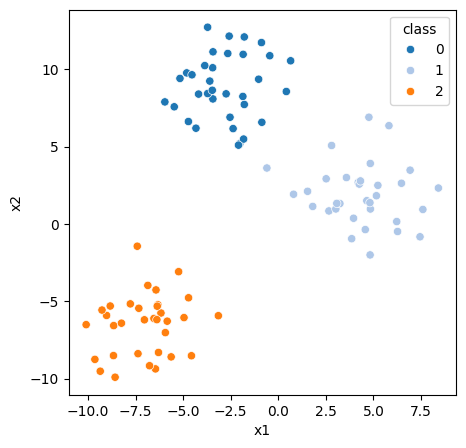

In [6]:
import seaborn as sns

plt.figure(figsize=(5,5))
sns.scatterplot(x = 'x1', y = 'x2', hue = 'class', data = df, legend = 'full', palette = 'tab20')

# Algorithm


## Step 1
Randomly pick 𝒌 data points as our initial Centroids.

In [7]:
k = 3

# Step 1
idx = np.random.randint(len(X)-1,size = k)# YOUR CODE HERE
centroids = X[idx, :]
idx
centroids

array([[-7.7726571 , -5.167312  ],
       [-7.32655276, -5.45210861],
       [-1.86102968,  8.24412157]])

## Step 2
Find the distance between each data points in our training set with the 𝒌 centroids.


In [8]:
from scipy.spatial.distance import cdist

# Step 2
distances = cdist(centroids,X,'euclidean')
print(distances.shape)
distances[0:5]

(3, 100)


array([[ 4.80958658, 14.79865758, 15.8673904 , 15.82399987,  1.71381447,
        12.03786207, 17.1866503 , 14.31969797, 15.53494761, 15.22381796,
        14.99624118,  1.62161927,  2.23683007, 12.17752836, 16.01215761,
         1.45556622,  1.44759125, 16.97885443,  1.6553172 ,  2.61488733,
        13.94175319,  1.26798333,  0.        , 18.26642863, 18.07267603,
        16.8644309 , 11.46693475,  4.04269724,  1.06539108,  4.63184117,
         1.33279243, 15.09435428, 14.30493917,  4.64283572, 17.83074598,
        14.19199266, 12.5523107 , 14.6565306 , 16.23826629, 12.98768901,
         4.04291366, 14.46574641, 13.24471363, 14.8066497 , 14.48179949,
        13.08632199,  2.68262221,  1.55684383,  1.50695226, 12.41798066,
        11.34091168, 14.10075811, 18.24449131,  1.42064682,  3.28128199,
         0.52926192, 15.15988719, 11.84310887, 16.53612657, 13.18237774,
         3.47231668, 12.77665026,  3.24529604, 11.12486031,  3.74524358,
         4.40698819, 17.39792125,  3.45978713, 13.9

## Step 3
Now assign each data point to the closest centroid

In [9]:
# Step 3
points = np.argmin(distances, axis=0)
points

array([1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 0, 1, 2, 0, 1, 2, 1,
       0, 2, 2, 2, 2, 1, 0, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 0, 1, 0, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 0, 1,
       2, 1, 2, 2, 2, 1, 0, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2])

## Step 4
Update centroid location by taking the average of the points in each cluster group.


In [10]:
# Step 4
temp_centroids = []

for cluster in range(k):
    # Update
    temp_cluster_centroid = X[points == cluster].mean(axis=0)
    temp_centroids.append(temp_cluster_centroid)

temp_centroids = np.array(temp_centroids)
temp_centroids

array([[-8.48622425, -5.05646669],
       [-6.55581373, -6.92539806],
       [ 0.71274196,  5.43283772]])

# Step 5
Centroid change? Convergence

In [11]:
centroids, temp_centroids

(array([[-7.7726571 , -5.167312  ],
        [-7.32655276, -5.45210861],
        [-1.86102968,  8.24412157]]),
 array([[-8.48622425, -5.05646669],
        [-6.55581373, -6.92539806],
        [ 0.71274196,  5.43283772]]))

In [12]:
# Step 5
if ( (centroids == temp_centroids).all() ):
    print("Done")
else:
    print("Not Done")
    centroids = temp_centroids

Not Done


# All together

In [13]:
def kmeans(X, k):

    # Step 1
    idx = np.random.randint(len(X)-1,size = k)#
    centroids = X[idx, :]

    
    while True:
        # Step 2
        distances = cdist(centroids,X,'euclidean')

        # Step 3
        points = np.argmin(distances, axis=0)

        # Step 4
        temp_centroids = []

        for cluster in range(k):
            # Update
            temp_cluster_centroid = X[points == cluster].mean(axis=0)
            temp_centroids.append(temp_cluster_centroid)

        temp_centroids = np.array(temp_centroids)

        # Step 5
        if ( (centroids == temp_centroids).all() ):
            # Done
            return points, centroids

        else:
            centroids = temp_centroids

In [14]:
k = 3
points, centroids = kmeans(X, k)

In [15]:
centroids

array([[-2.82641022,  8.85723525],
       [-7.02379204, -6.47232379],
       [ 4.35914117,  1.90467057]])

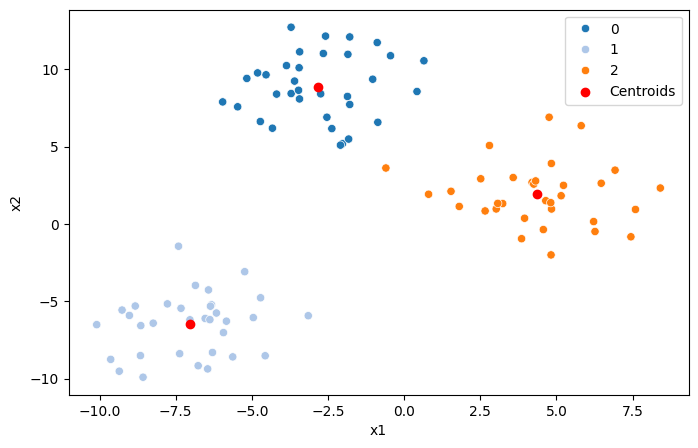

In [16]:
df = pd.DataFrame()
df['cluster'] = points
df['x1'] = X[:, 0]
df['x2'] = X[:, 1]

# plot
plt.figure(figsize=(8,5))
sns.scatterplot(x = 'x1', y = 'x2', hue = 'cluster', data = df, legend = 'full', palette = 'tab20')
plt.scatter(centroids[:, 0], centroids[:, 1], c = 'r', label = 'Centroids')
plt.legend()

# The Elbow Method + Sklearn

In [17]:
from sklearn.cluster import KMeans

k = 2
kmeans = KMeans(n_clusters = k, random_state  = 42).fit(X)

In [18]:
print("Points: ", kmeans.labels_)
# print("Centroids: ", kmeans.cluster_centers_[0])

Points:  [1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1 1 0 1 1 0 0 0 0 1 1 1 1 0 0 1 0 0 0
 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 1 1 0
 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]


In [19]:
print("Score: ", kmeans.inertia_)
print("Score: ", kmeans.score(X))

Score:  2361.7735151752468
Score:  -2361.773515175247


In [20]:
wcss = []

for k in range(1, 20):
    kmeans = KMeans(n_clusters = k, random_state  = 42).fit(X)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method

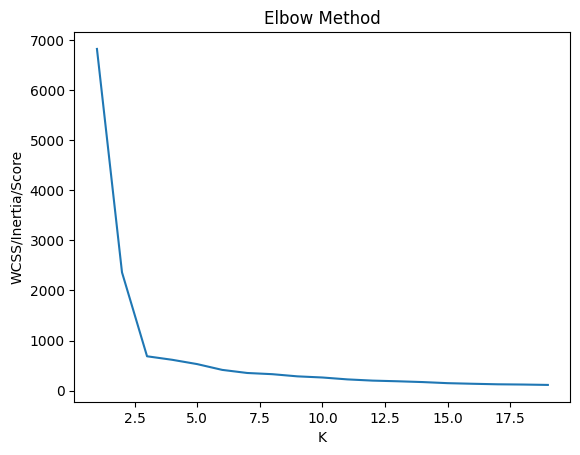

In [21]:
plt.plot(range(1, 20), wcss)
plt.title("Elbow Method")
plt.xlabel("K")
plt.ylabel("WCSS/Inertia/Score")
plt.show()